In [11]:
from common import *
from process_df import *
from plotting import *
import pickle
from sklearn.model_selection import train_test_split

Welcome to JupyROOT 6.28/00


In [8]:
new_df = load("new_df_invmassdaughter_train")
only_411 = load("only_411_invmassdaughter_train")
only_4122 = load("only_4122_invmassdaughter_train")

In [9]:
training_columns = get_columns(new_df)
training_columns.remove('DMesons_pdgId')
#D and Lambda
new_df['DMesons_pdgId'] = new_df['DMesons_pdgId'].replace({411: 0, 4122: 1})
X_train, X_test, y_train, y_test = train_test_split(new_df[training_columns], new_df['DMesons_pdgId'], test_size=0.2, random_state=42)

#only DMesons
only_411['DMesons_pdgId'] = only_411['DMesons_pdgId'].replace({411: 0, 4122: 1})
X_train1, X_test1, y_train1, y_test1 = train_test_split(only_411[training_columns], only_411['DMesons_pdgId'], test_size=0.2, random_state=42)

#only Lambda
only_4122['DMesons_pdgId'] = only_4122['DMesons_pdgId'].replace({411: 0, 4122: 1})
X_train2, X_test2, y_train2, y_test2 = train_test_split(only_4122[training_columns], only_4122['DMesons_pdgId'], test_size=0.2, random_state=42)

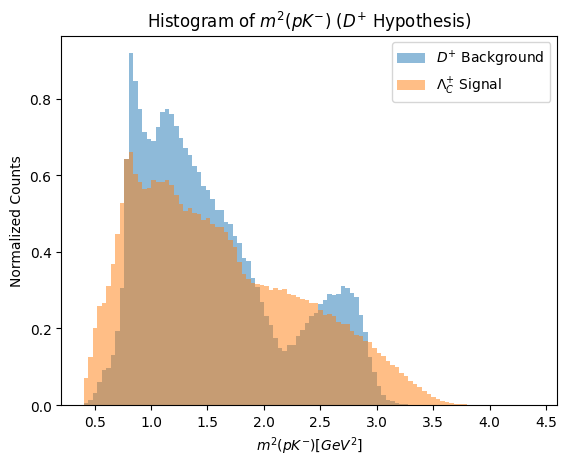

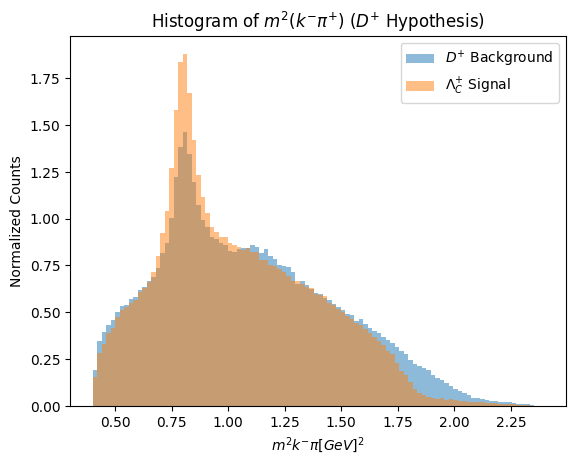

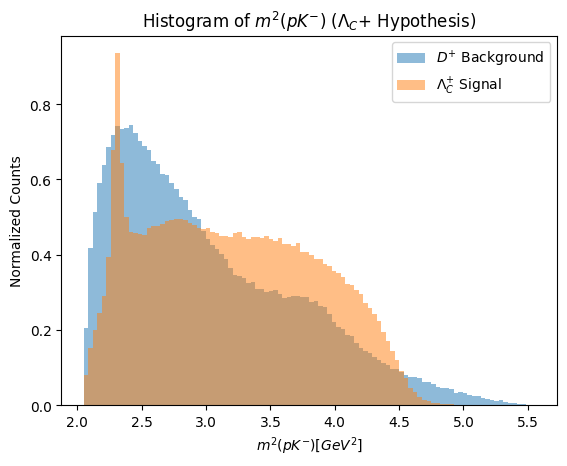

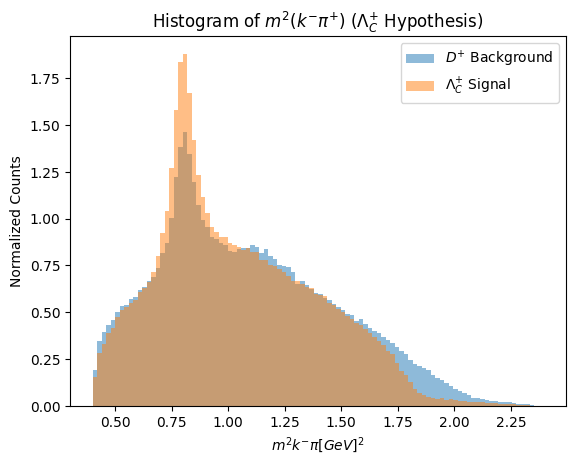

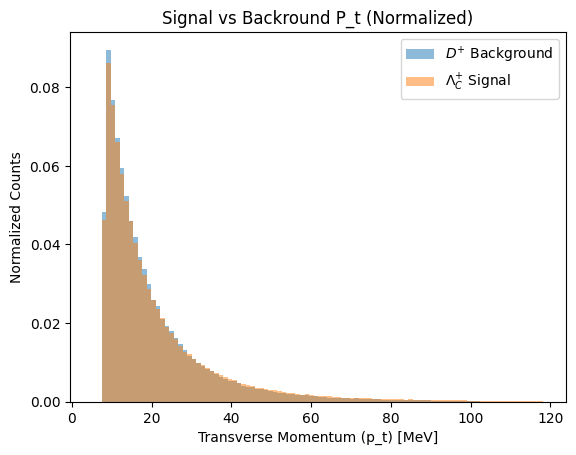

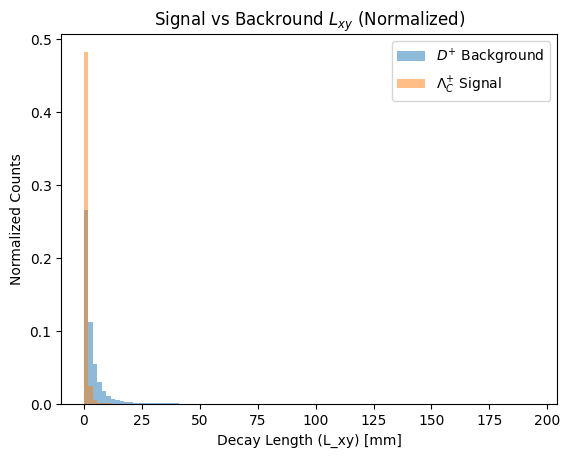

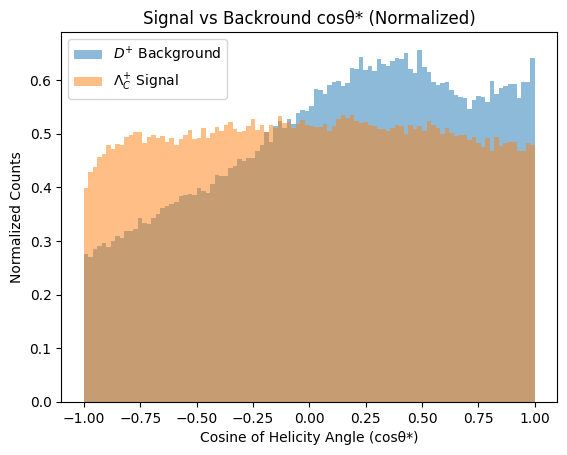

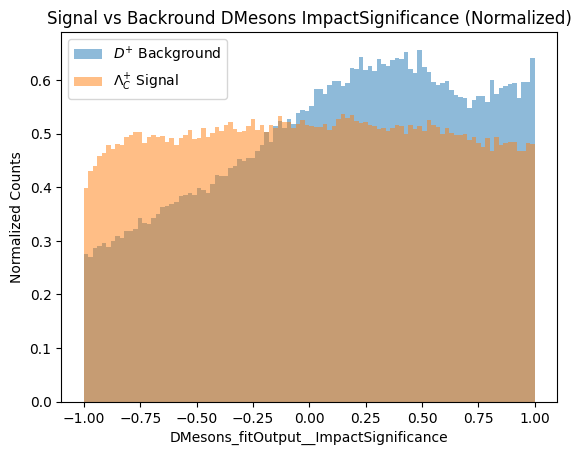

In [12]:
#(X_train1[column], X[train2], title, xlabel)

data_list = [(X_train1["inv_mass1"], X_train2["inv_mass1"], "Histogram of $m^2(pK^{-})$ ($D^{+}$ Hypothesis)", "$m^2(pK^{-}) [GeV^{2}]$"),
             (X_train1["inv_mass2"], X_train2["inv_mass2"], "Histogram of $m^2(k^{-}\pi^{+})$ ($D^{+}$ Hypothesis)", "$m^2 k^{-}\pi [GeV]^2$"),
             (X_train1["inv_mass3"], X_train2["inv_mass3"], "Histogram of $m^2(pK^{-})$ ($\Lambda_C{+}$ Hypothesis)", "$m^2(pK^{-}) [GeV^{2}]$"),
             (X_train1["inv_mass4"], X_train2["inv_mass4"], "Histogram of $m^2(k^{-}\pi^{+})$ ($\Lambda_C^{+}$ Hypothesis)", "$m^2 k^{-}\pi [GeV]^2$"),
             (X_train1["DMesons_pt"], X_train2["DMesons_pt"], "Signal vs Backround P_t (Normalized)", "Transverse Momentum (p_t) [MeV]"),
             (X_train1["DMesons_fitOutput__Lxy"], X_train2["DMesons_fitOutput__Lxy"], "Signal vs Backround $L_{xy}$ (Normalized)", "Decay Length (L_xy) [mm]"),
             (X_train1["DMesons_costhetastar"], X_train2["DMesons_costhetastar"], "Signal vs Backround cosθ* (Normalized)", "Cosine of Helicity Angle (cosθ*)"),
             (X_train1["DMesons_fitOutput__ImpactSignificance"], X_train2["DMesons_fitOutput__ImpactSignificance"], "Signal vs Backround DMesons ImpactSignificance (Normalized)", "DMesons_fitOutput__ImpactSignificance")
            ]

def plot_normalized_histograms(data_list, bins):
    for data1, data2, title, xlabel in data_list:
        hist_normalized(data1, data2, bins)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel("Normalized Counts")
        plt.legend()
        plt.show()

plot_normalized_histograms(data_list, 100)

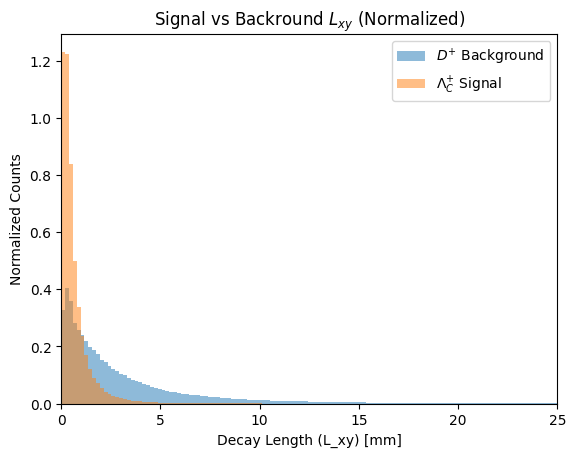

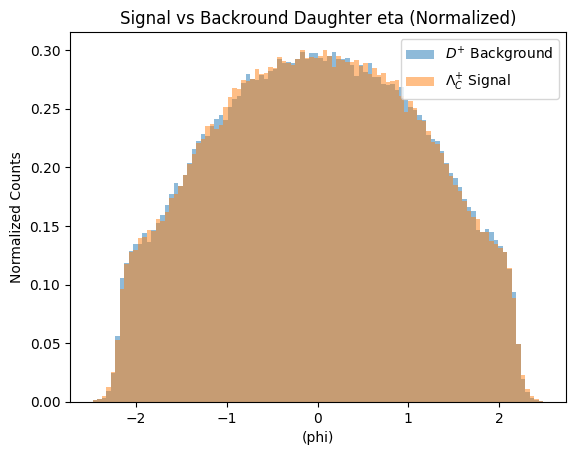

In [13]:
hist_normalized(X_train1["DMesons_fitOutput__Lxy"], X_train2["DMesons_fitOutput__Lxy"], 1000)
plt.title("Signal vs Backround $L_{xy}$ (Normalized)")
plt.xlabel("Decay Length (L_xy) [mm]")
plt.xlim(0, 25)
plt.ylabel("Normalized Counts")
plt.legend()
plt.show()

hist_normalized(X_train1["daughter_eta2"], X_train2["daughter_eta2"], 100)
plt.title("Signal vs Backround Daughter eta (Normalized)")
plt.xlabel("(phi)")
plt.ylabel("Normalized Counts")
plt.legend()
plt.show()